## Import CSV

In [247]:
import pandas
def read_csv(filename,folder):
    folder=folder+"/"+filename+".csv"
    return pandas.read_csv(folder,encoding='ISO-8859-1')

In [248]:
folder="/Users/wenyongjing/Downloads/第二章"
data=read_csv(filename="WEN",folder=folder)
data.columns = ( 'DATE','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh', 'spx')
data = data.fillna(method='ffill')
data.head()

,DATE,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,2017-08-30,214.569443,11.22,9.983647,25.105610,45.747974,66.125107,32.038193,4761.720215
1,2017-08-31,215.804016,10.59,10.013153,25.402401,45.260769,65.929901,31.872953,4789.180176
2,2017-09-01,216.256409,10.13,9.994713,25.531948,45.056149,65.812805,31.795191,4798.990234
3,2017-09-05,214.626022,12.23,10.040814,25.362762,45.465393,66.593506,32.047920,4762.750000
4,2017-09-06,215.304565,11.63,10.022372,25.482641,45.358208,66.359299,31.931274,4777.689941


## Visualize Data

In [249]:
from matplotlib import pyplot
def plot_data(dataset,groups):
    i = 1
    pyplot.figure()
    values = dataset.values
    for group in groups:
    	pyplot.subplot(len(groups), 1, i)
    	pyplot.plot(values[:, group])
    	pyplot.title(dataset.columns[group], y=0.5, loc='right')
    	i += 1
    pyplot.show()

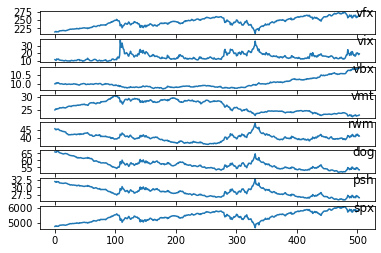

In [250]:
plot_data(data,groups=list(range(1,9)))

## Data Summary

In [251]:
data.describe()

,vfx,vix,vbx,vmt,rwm,dog,psh,spx
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,244.395805,15.333413,10.017343,26.430865,40.405756,57.019953,28.412942,5431.560540
std,13.908723,4.533763,0.286577,2.149230,2.195040,3.233095,1.507878,312.578747
min,210.128433,9.140000,9.683455,22.548750,36.076992,51.579994,25.667391,4672.660156
25%,235.074059,12.175000,9.805305,24.422805,39.192882,54.586658,27.226387,5222.270142
50%,244.253342,14.455000,9.943701,26.665625,40.392239,56.529932,28.301810,5430.175049
75%,255.819534,17.884999,10.096783,28.382936,41.760325,58.581785,29.345070,5685.679932
max,273.387878,37.320000,10.912119,30.474449,48.979759,66.593506,32.930397,6083.819824


## Independent and identically distributed (I.I.D.) Testing

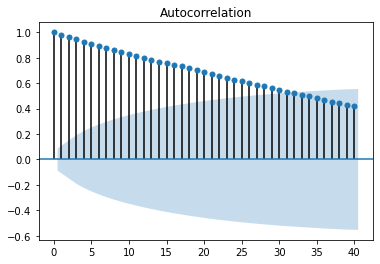

In [252]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(data['vfx'].values, lags=40)
plt.show()

## Histogram

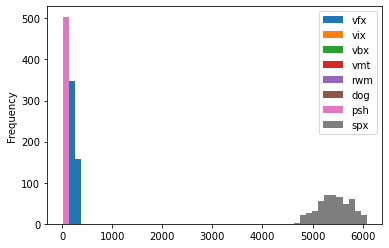

In [253]:
data.plot(kind="hist",bins=50)

## Normal Test 

In [254]:
from scipy import stats
print(stats.shapiro(data['vfx'].values))
print(stats.shapiro(data['vix'].values))
print(stats.shapiro(data['vbx'].values))
print(stats.shapiro(data['vmt'].values))
print(stats.shapiro(data['rwm'].values))
print(stats.shapiro(data['dog'].values))
print(stats.shapiro(data['psh'].values))
print(stats.shapiro(data['spx'].values))

ShapiroResult(statistic=0.9867095947265625, pvalue=0.00014817931514699012)
ShapiroResult(statistic=0.9145379066467285, pvalue=2.8941739379140154e-16)
ShapiroResult(statistic=0.8311961889266968, pvalue=1.1175922448543255e-22)
ShapiroResult(statistic=0.920864462852478, pvalue=1.3000096503034287e-15)
ShapiroResult(statistic=0.9752805829048157, pvalue=1.6048961981596221e-07)
ShapiroResult(statistic=0.943689227104187, pvalue=6.682389017131918e-13)
ShapiroResult(statistic=0.97395259141922, pvalue=8.181211796909338e-08)
ShapiroResult(statistic=0.9866713285446167, pvalue=0.0001442709326511249)


## *** LSTM ***

In [255]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def Standard_MinMax(data):
    sc = MinMaxScaler(feature_range = (0, 1))
    return sc.fit_transform(data.reshape(-1,1))

In [256]:
folder="/Users/wenyongjing/Downloads/第二章"
data=read_csv(filename="WEN",folder=folder)
data.columns = ( 'DATE','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh', 'spx')
del data['DATE']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
data.head()

,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,214.569443,11.22,9.983647,25.105610,45.747974,66.125107,32.038193,4761.720215
1,215.804016,10.59,10.013153,25.402401,45.260769,65.929901,31.872953,4789.180176
2,216.256409,10.13,9.994713,25.531948,45.056149,65.812805,31.795191,4798.990234
3,214.626022,12.23,10.040814,25.362762,45.465393,66.593506,32.047920,4762.750000
4,215.304565,11.63,10.022372,25.482641,45.358208,66.359299,31.931274,4777.689941


In [257]:
data.shape

(504, 8)

## Series to Supervised

In [258]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [259]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.070203,0.073811,0.244324,0.322604,0.749528,0.968801,0.877158,0.063111,0.089719,0.051455,0.268338,0.360050,0.711768,0.955799,0.854407,0.082570
2,0.089719,0.051455,0.268338,0.360050,0.711768,0.955799,0.854407,0.082570,0.096871,0.035131,0.253330,0.376396,0.695909,0.948000,0.843700,0.089522
3,0.096871,0.035131,0.253330,0.376396,0.695909,0.948000,0.843700,0.089522,0.071098,0.109652,0.290852,0.355049,0.727627,1.000000,0.878497,0.063841
4,0.071098,0.109652,0.290852,0.355049,0.727627,1.000000,0.878497,0.063841,0.081824,0.088361,0.275842,0.370174,0.719320,0.984400,0.862437,0.074428
5,0.081824,0.088361,0.275842,0.370174,0.719320,0.984400,0.862437,0.074428,0.081824,0.085522,0.298355,0.387373,0.730648,0.992200,0.863776,0.074598


In [260]:
pred = {'vfx': 8}
reframed = pandas.concat([reframed.iloc[:,0:8],reframed.iloc[:,pred['vfx']]],axis=1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.070203,0.073811,0.244324,0.322604,0.749528,0.968801,0.877158,0.063111,0.089719
2,0.089719,0.051455,0.268338,0.360050,0.711768,0.955799,0.854407,0.082570,0.096871
3,0.096871,0.035131,0.253330,0.376396,0.695909,0.948000,0.843700,0.089522,0.071098
4,0.071098,0.109652,0.290852,0.355049,0.727627,1.000000,0.878497,0.063841,0.081824
5,0.081824,0.088361,0.275842,0.370174,0.719320,0.984400,0.862437,0.074428,0.081824


## Data Split

In [261]:
train = reframed.values[:252,:]
test = reframed.values[252:504,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((252, 8), (252,), (251, 8), (251,))

## LSTM

In [262]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X  = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


## Training

In [263]:
history = model.fit(train_X, train_y, epochs=100, 
                    batch_size=72, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

Epoch 1/100
4/4 [==============================] - 0s 102ms/step - loss: 0.2122 - val_loss: 0.4311
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1764 - val_loss: 0.3808
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1449 - val_loss: 0.3341
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1173 - val_loss: 0.2911
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0935 - val_loss: 0.2518
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0734 - val_loss: 0.2163
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0569 - val_loss: 0.1847
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0438 - val_loss: 0.1571
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0341 - val_loss: 0.1334
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0274 - val_loss: 0.1137
Epoch 11/100
4/4 [=========

## Plot Loss Curve

Populating the interactive namespace from numpy and matplotlib


/Users/wenyongjing/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['real', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


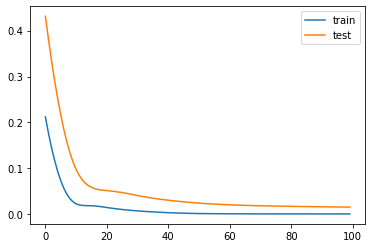

In [264]:
%pylab inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Model Predict

In [265]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
yhat.shape, test_X.shape

((251, 1), (251, 8))

## Invert scaling for forecast

In [266]:
pred = {'VFINX': 0}
inv_yhat = concatenate((yhat, numpy.delete(test_X, pred['VFINX'], axis=1)), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape,inv_yhat

((251,),
 array([256.27062911, 256.40494388, 255.64214517, 254.55313297,
        253.68962268, 252.91634936, 253.51399015, 254.03772048,
        254.10612592, 255.26768364, 255.55301675, 254.05701065,
        255.22467667, 255.0202597 , 256.8706906 , 256.5232715 ,
        255.77466516, 255.85116221, 255.30300621, 255.59441746,
        255.81534946, 255.98666848, 255.42718573, 255.49367573,
        252.87875691, 251.04913949, 250.5189238 , 250.10677178,
        242.6631724 , 238.02634908, 240.77614636, 239.93051606,
        245.12193738, 244.24292256, 240.90942989, 240.04923015,
        239.21663089, 237.7703886 , 230.44527331, 234.4650224 ,
        230.85839248, 229.18272312, 233.02653991, 235.5397423 ,
        238.37475795, 237.28632264, 238.1458399 , 239.54905449,
        243.65381832, 243.13989897, 240.66061085, 236.6732829 ,
        236.08879947, 234.60163155, 236.75105252, 237.22026625,
        233.28841262, 229.13554591, 230.27484037, 229.24607036,
        232.3585066 , 232.36002

## Invert scaling for actual

In [267]:
real = test_y.reshape((len(test_y), 1))
inv_y = concatenate((real, numpy.delete(test_X, pred['VFINX'], axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(251,)

## RMSE

In [268]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.989


In [269]:
#inv_y = np.cumprod(inv_y+1)
#inv_yhat = np.cumprod(inv_yhat+1)
inv_y,inv_yhat

(array([257.86724854, 257.4546814 , 256.73501587, 255.87145996,
        255.32447815, 255.80430603, 256.77334595, 256.86935425,
        258.28945923, 258.40457153, 256.965271  , 258.3565979 ,
        258.67318726, 260.71694946, 260.62103271, 259.70944214,
        259.38183594, 258.52426147, 259.28549194, 259.2951355 ,
        260.23947144, 260.14312744, 260.32623291, 258.25445557,
        256.83798218, 256.73196411, 256.44287109, 248.01141357,
        242.91392517, 246.38290405, 244.93751526, 250.20840454,
        250.15058899, 246.57562256, 246.4888916 , 245.42893982,
        244.0894928 , 236.56381226, 240.95782471, 236.78543091,
        235.23405457, 238.94392395, 241.53598022, 244.0894928 ,
        242.57669067, 243.93534851, 245.48672485, 250.69020081,
        250.18914795, 247.93426514, 243.04884338, 242.69230652,
        240.91928101, 243.54992676, 244.10879517, 240.05204773,
        235.70620728, 236.4385376 , 234.90641785, 238.57771301,
        239.35824585, 244.87004089, 244.

## Predict vs Real

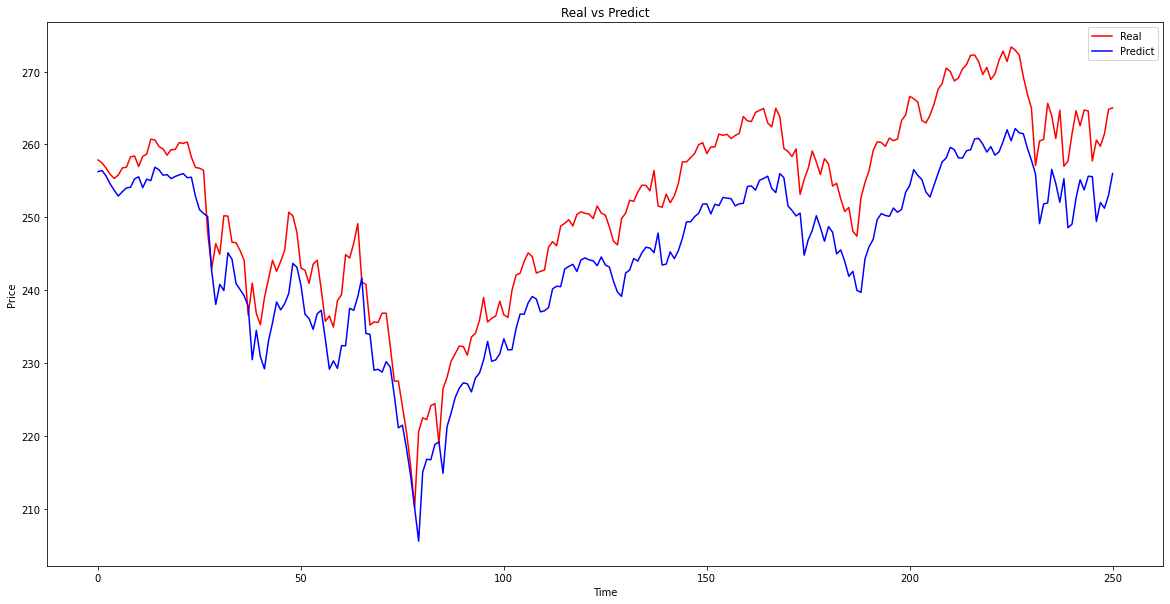

In [270]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real')
plt.plot(inv_yhat, color = 'blue', label = 'Predict')
plt.title('Real vs Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## CNN Data Split (same with LSTM)

In [271]:
train = reframed.values[:252,:]
test = reframed.values[252:504,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((252, 8), (252,), (251, 8), (251,))

## CNN Data Split

In [272]:
from keras.layers import Activation, Dense
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=(8,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae','mse'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


## Training

In [273]:
history = model.fit(train_X, train_y, epochs=100, 
                    batch_size=72, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

Epoch 1/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0744 - mae: 0.2189 - mse: 0.0744 - val_loss: 0.0662 - val_mae: 0.2205 - val_mse: 0.0662
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0722 - mae: 0.2155 - mse: 0.0722 - val_loss: 0.0665 - val_mae: 0.2212 - val_mse: 0.0665
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0704 - mae: 0.2127 - mse: 0.0704 - val_loss: 0.0668 - val_mae: 0.2219 - val_mse: 0.0668
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0688 - mae: 0.2100 - mse: 0.0688 - val_loss: 0.0672 - val_mae: 0.2226 - val_mse: 0.0672
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0673 - mae: 0.2075 - mse: 0.0673 - val_loss: 0.0675 - val_mae: 0.2233 - val_mse: 0.0675
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0658 - mae: 0.2051 - mse: 0.0658 - val_loss: 0.0678 - val_mae: 0.2240 - val_mse: 0.0678
Epoch 7/100
4/4 [================

## Plot Loss Curve

Populating the interactive namespace from numpy and matplotlib


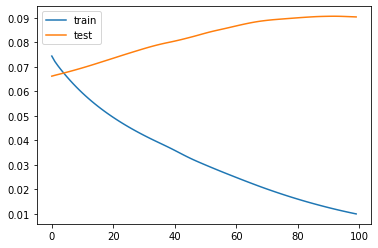

In [275]:
%pylab inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Model Predict

In [276]:
yhat = model.predict(test_X)
yhat.shape, test_X.shape

((251, 1), (251, 8))

In [277]:
pred = {'vfx': 0}
inv_yhat = concatenate((yhat, numpy.delete(test_X, pred['vfx'], axis=1)), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(251,)

In [278]:
real = test_y.reshape((len(test_y), 1))
inv_y = concatenate((real, numpy.delete(test_X, pred['vfx'], axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(251,)

In [279]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 19.011


In [280]:
#inv_y = np.cumprod(inv_y+1)
#inv_yhat = np.cumprod(inv_yhat+1)

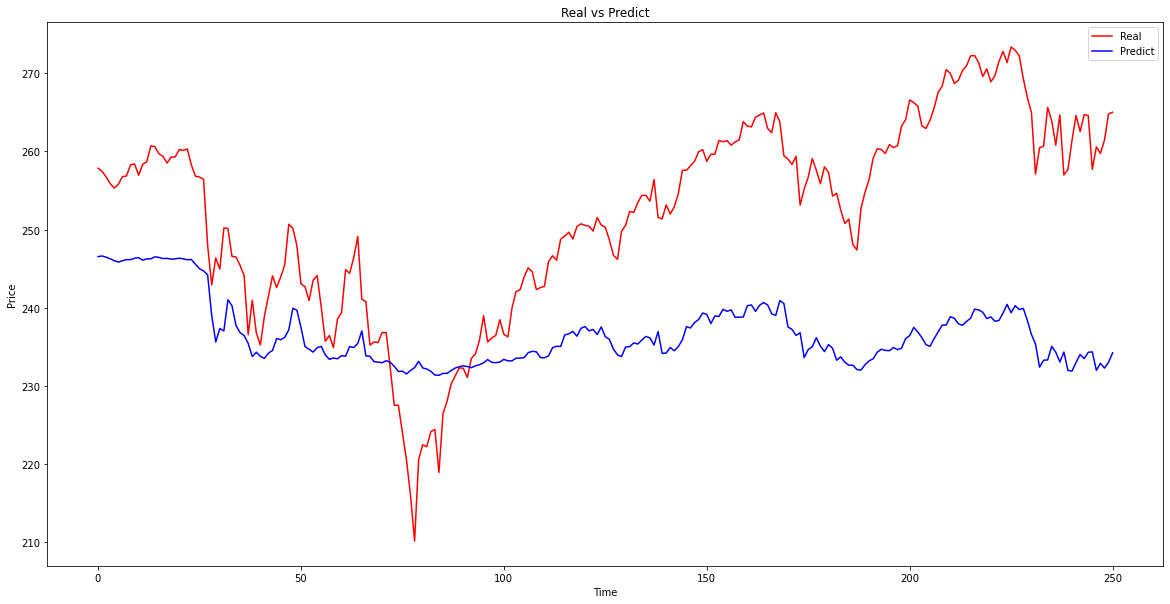

In [281]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real')
plt.plot(inv_yhat, color = 'blue', label = 'Predict')
plt.title('Real vs Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## *** SVM Classification ***

In [48]:
folder="C:/Users/user/Desktop/NCCU_DB/DataBase"
data=read_csv(filename="FEAT_DATA",folder=folder)
data.head()

,Date,VBMFX,VFINX,VIX.chg,VIX.ret,SPX_SMA,VFINX_SKW,VBMFX_SKW,VIX_SKW
0,2020/5/29,0.003475,0.047559,5.470001,0.095864,400.036400,-0.478190,0.439268,2.747991
1,2020/4/30,0.016932,0.128139,5.680000,0.068690,147.717885,-0.468298,0.471941,2.754459
2,2020/3/31,-0.005856,-0.124013,24.860000,0.619796,-500.768910,-0.952582,0.596769,2.762359
3,2020/2/28,0.017066,-0.082413,11.600001,0.615711,239.538152,-0.840620,0.599255,3.167991
4,2020/1/31,0.021187,-0.000503,3.670000,0.229950,816.021351,-0.870556,0.657260,3.488195


## Data convert to Relative Change

In [49]:
import numpy
y = data['VFINX']
#x = data[['VBMFX','VIX.chg','VIX.ret','SPX_SMA','VFINX_SKW','VBMFX_SKW','VIX_SKW']]
x = data[['VIX.ret','SPX_SMA']]
x.head()

,VIX.ret,SPX_SMA
0,0.095864,400.036400
1,0.068690,147.717885
2,0.619796,-500.768910
3,0.615711,239.538152
4,0.229950,816.021351


## Y convert to Category

In [50]:
#y = (y-y.mean())/y.std()
y = numpy.where(y>0, 1, 0)
#y = numpy.where(y>1, 1, numpy.where(y<-1, -1, 0))

In [51]:
from sklearn.model_selection     import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.33, random_state = 42 )

## Standardize Function

In [52]:
from sklearn.preprocessing       import StandardScaler
def Standard(data):
    sc = StandardScaler()
    # fit_transform will fixed mean & vol by data
    # transform reuse above mean & vol
    return sc.fit_transform(data)

In [53]:
x = Standard(x)
x.shape

(335, 2)

## SVM Classifier

In [54]:
def plot_classifier(data,target,type,C=100,svc_kernel="rbf"):
    if type == 'SVC':
        from sklearn.svm import SVC
        clf = SVC(C=C,kernel=svc_kernel)
        clf.fit(data, target)
    if type == 'Logistic':
        from sklearn.linear_model import LogisticRegression
        clf = LogisticRegression()
        clf.fit(data, target)
    plot_estimator(estimator=clf, data=data ,target=target)
    
def plot_estimator(estimator, data, target):
    # *** estimator model must trained by two variables ***
    x_min, x_max = data[:, 0].min() - 0.02, data[:, 0].max() + 0.02
    y_min, y_max = data[:, 1].min() - 0.02, data[:, 1].max() + 0.02
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, 0.005), numpy.arange(y_min, y_max, 0.005))
    Z = estimator.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap = plt.cm.brg)
    plt.xlabel('Index Return')
    plt.ylabel('Dividend Growth')
    plt.show()

## Plot Decision Boundary

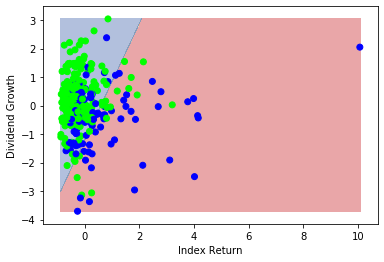

In [55]:
import matplotlib.pyplot as plt
plot_classifier(data=x,target=y,type="SVC",svc_kernel="linear",C=100)

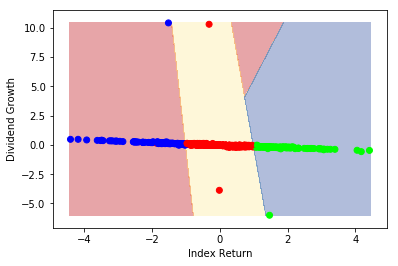

In [72]:
plot_classifier(data=x[:1000,:],target=y[:1000],type="SVC",svc_kernel="linear",C=100)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


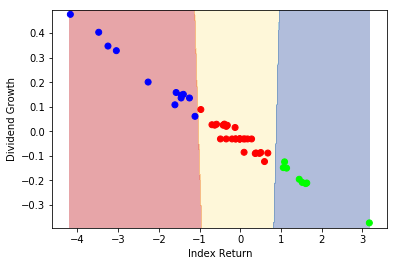

In [73]:
plot_classifier(data=x[:50,:],target=y[:50],type="SVC",svc_kernel="rbf",C=1000)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


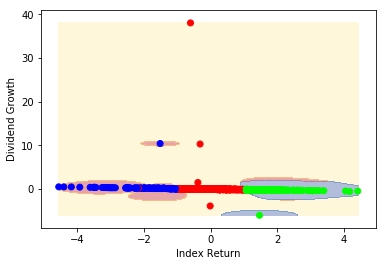

In [74]:
plot_classifier(data=x[:1500,:],target=y[:1500],type="SVC",svc_kernel="rbf",C=1000)